# Dimensionality Reduction

In this exercise, we will learn several dimensionality reduction methods using the Penguin dataset.

## Preprocessing


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the penguins dataset
data_table = sns.load_dataset("penguins")
data_table.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We will use (1) species as the *class* labels, and (2) other columns as the *features*.

Let's preprocess the data by 
1. Impute the missing value with the most frequent value
2. Represent the categorical variables using one-hot encoding

Let's create variable `y` and variable `X` for the class and features, respectively.


In [7]:
data_table

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,Male
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
data_table.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [5]:
# TODO: Impute the missing values
for column in data_table.columns:
    data_table[column].fillna(data_table[column].mode()[0], inplace= True)

/tmp/ipykernel_11004/1300579011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_table[column].fillna(data_table[column].mode()[0], inplace= True)


In [12]:
# TODO: Represent the island and sex using one-hot encoding
df= pd.get_dummies(data_table,columns=["island","sex"],dtype="int64", drop_first=True)
X = df.drop(columns=["species"]).values
y = df["species"].values

In [13]:
X = X.astype(float)
ylabel, yids = np.unique(y, return_inverse=True)

# Principal Component Analysis

Let's implement PCA using numpy. 
1. Center the data (the average of each feature is 0)
2. Compute the covariance matrix
3. Compute the 2 eigenvectors with the largest eigenvalues
4. Project X to 2D by using the eigenvectors


In [18]:
import numpy as np

# TODO: Center the data
Xc = X - np.mean(X, axis=0)

# TODO: Compute the covariance matrix
Cov=Xc.T @ Xc

# TODO: Compute the 2 largest eigenvalues and corresponding eigenvectors
# Use np.linalg.eig or scipy.linalg.eigs
lam, v =np.linalg.eig(Cov)
focal_basis_vector=np.argsort(lam)[-2:]
v=v[:,focal_basis_vector]
# TODO: Project the data onto the 2D by using the eigenvectors
Xproj=Xc @ v

Let's visualize the projected data. Your todo is to properly labels X and Y as "PC1" and "PC2", respectively. You can do this by ax.set_xlabel and ax.set_ylabel.


Text(0, 0.5, 'PC2')

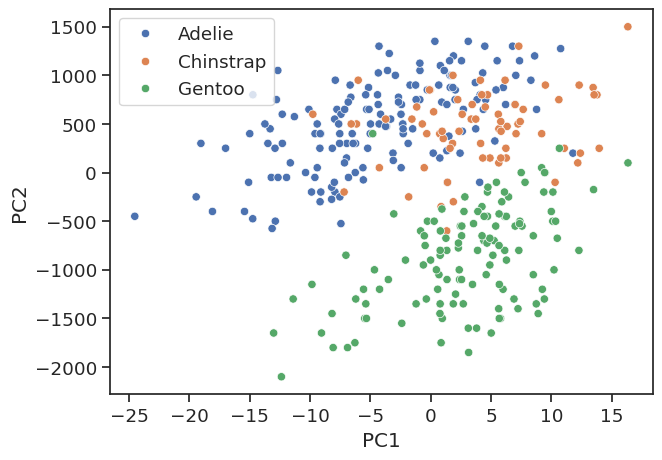

In [19]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")